## Exploratory Data Analysis

For exploratory data analysis, pre transformed and pre normalized version of the dataset was used.

In [1]:
import pandas as pd # For Dataframe manupulation
import numpy as np # For arrays manipulation

In [2]:
# importing pre transformed dataset for exploratory analysis

dfx = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification.csv") 
dfx = dfx[['alpha', 'delta', 'u','g','r','i','z','redshift','class']]
dfx

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


#### Descriptive Statistics

In [3]:
import scipy.stats as stats

# calculate the skewness
skewness = stats.skew(dfx.drop(['class'],axis='columns'))

skewness

array([-2.85104378e-02,  1.75075936e-01, -3.13844535e+02, -3.14271980e+02,
       -5.07850814e-01, -4.04160677e-01, -3.14754697e+02,  2.52356848e+00])

In [4]:
# calculate the variance

variance = np.var(dfx.drop(['class'],axis='columns'))
variance

alpha       9312.589372
delta        385.909020
u           1009.277745
g           1008.070982
r              3.440099
i              3.090163
z           1006.665549
redshift       0.533928
dtype: float64

In [5]:
# calculate the kurtosis
from scipy.stats import kurtosis

kurt = kurtosis(dfx.drop(['class'],axis='columns'))
kurt

array([-5.37223944e-01, -1.04307004e+00,  9.89934152e+04,  9.91731884e+04,
       -3.76198755e-01, -2.34892721e-01,  9.93763762e+04,  9.97235687e+00])

In [6]:
# adding skewness, variance and kurtosis to the output of descriptive analysis

df_skewness = pd.DataFrame(skewness)
df_kurtosis = pd.DataFrame(kurt)
df_variance = pd.DataFrame(variance)

df_skewness = df_skewness.T # to transpose the dataframe
df_skewness = df_skewness.rename(index = {0:'skewness'})
df_skewness = df_skewness.rename(columns = {0:'alpha',1:'delta',2:'u',3:'g',4:'r',5:'i',6:'z',7:'redshift'})

df_kurtosis = df_kurtosis.T # to transpose the dataframe
df_kurtosis = df_kurtosis.rename(index = {0:'kurtosis'})
df_kurtosis = df_kurtosis.rename(columns = {0:'alpha',1:'delta',2:'u',3:'g',4:'r',5:'i',6:'z',7:'redshift'})

df_variance = df_variance.T # to transpose the dataframe
df_variance = df_variance.rename(index = {0:'variance'})

descriptive_stats = dfx.describe()

descriptive_stats  = pd.concat([descriptive_stats,df_skewness,df_variance,df_kurtosis])

In [7]:
descriptive_stats 

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245
skewness,-0.028510,0.175076,-313.844535,-314.271980,-0.507851,-0.404161,-314.754697,2.523568
variance,9312.589372,385.909020,1009.277745,1008.070982,3.440099,3.090163,1006.665549,0.533928


In [8]:
descriptive_stats.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_des_stats.csv")

#### Data Pattern Visualization

##### Visualization of distribution of astronomical objects of stars, galaxies and quasars

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


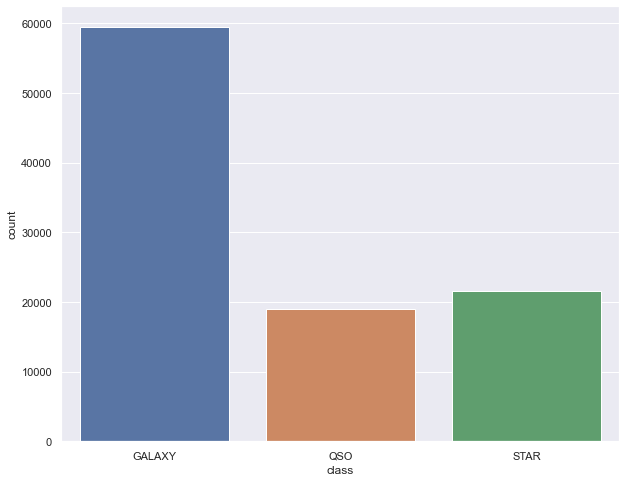

In [9]:
# visualizing distribution of each class by a bar chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(dfx['class'])
plt.show()

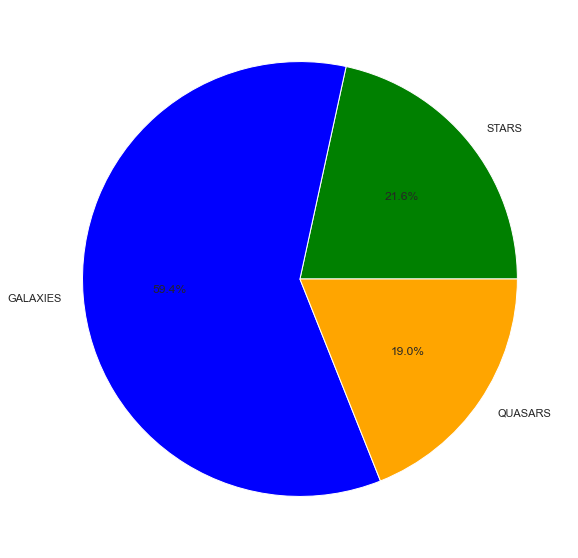

In [10]:
# # visualizing distribution of each class by a pie chart

stars_df = dfx.loc[dfx['class'] == 'STAR']
galaxies_df = dfx.loc[dfx['class'] == 'GALAXY']
quasars_df = dfx.loc[dfx['class'] == 'QSO']

labels= ['STARS', 'GALAXIES', 'QUASARS']
sizes = [len(stars_df)/100, len(galaxies_df)/100, len(quasars_df)/100]
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', colors=['green','blue','orange'])
plt.show()

In [11]:
# obtaing number of objects from each class
value_counts = dfx['class'].value_counts()

print(value_counts)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


##### Distribution of redshifts for each class

Box Plots

In [12]:
# filtering each class
stars = dfx[dfx['class'] == 'STAR']
quasars = dfx[dfx['class'] == 'QSO']
galaxies = dfx[dfx['class'] == 'GALAXY']

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

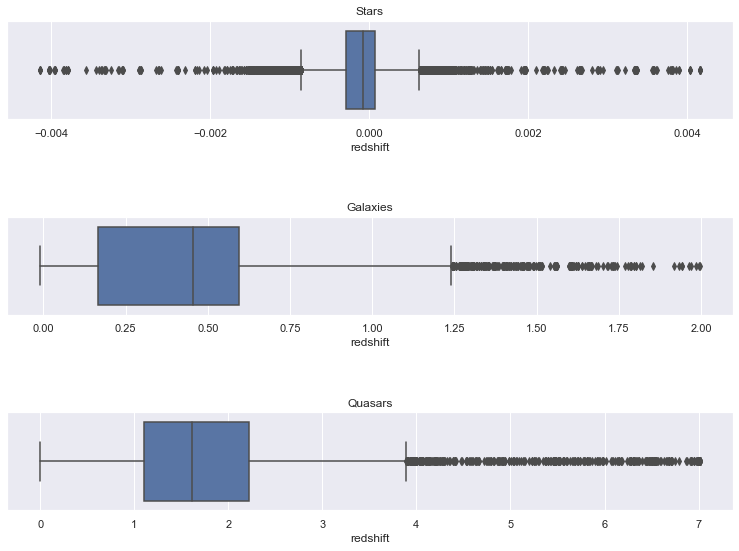

In [13]:
# box plots to visualize the distribution of redshifts for each class

sns.set(style='darkgrid')
fig, axs = plt.subplots(nrows=3)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.subplots_adjust(hspace=1)
sns.boxplot(stars['redshift'], ax=axs[0]).set_title('Stars')
sns.boxplot(galaxies['redshift'], ax=axs[1]).set_title('Galaxies')
sns.boxplot(quasars['redshift'], ax=axs[2]).set_title('Quasars')
plt.show()

Violin Plots

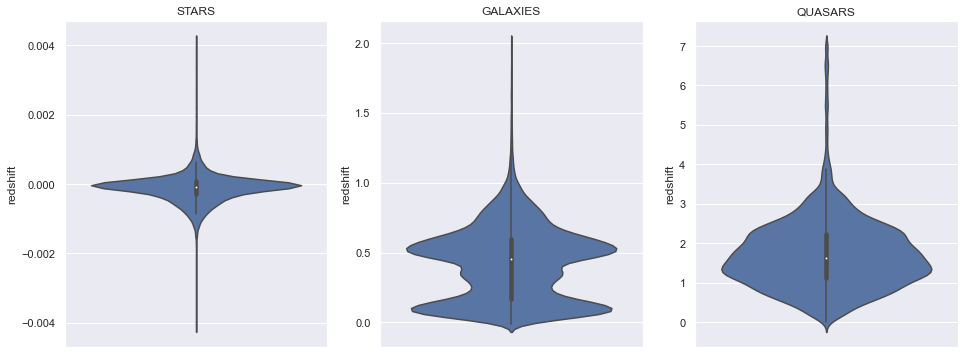

In [14]:
# violin plots to visualize the distribution of redshifts for each class

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 6))
ax = sns.violinplot(y="redshift", data=stars, ax = axes[0])
ax.set_title("STARS")
ax = sns.violinplot(y="redshift", data=galaxies, ax = axes[1])
ax.set_title("GALAXIES")
ax = sns.violinplot(y="redshift", data=quasars, ax = axes[2])
ax.set_title("QUASARS")
print()

#### Correlation Analysis

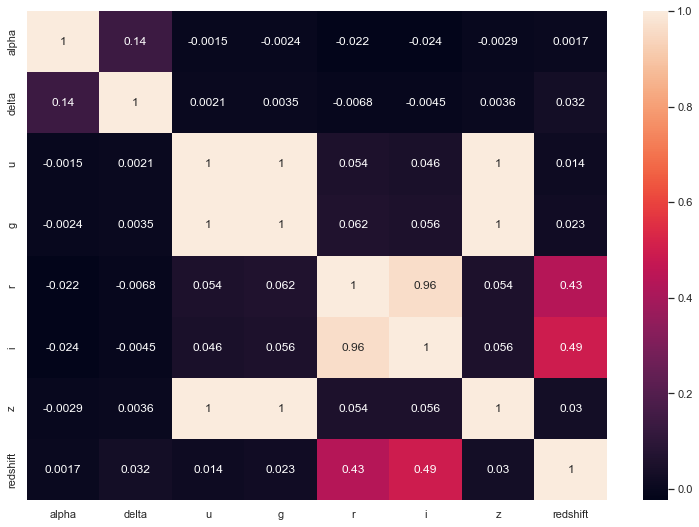

In [15]:
# heatmap to visualize and analyze correlation

dfx_corr = dfx.corr()
fig = plt.gcf()
fig.set_size_inches(13,9)
sns.heatmap(dfx_corr, annot=True)
plt.show()

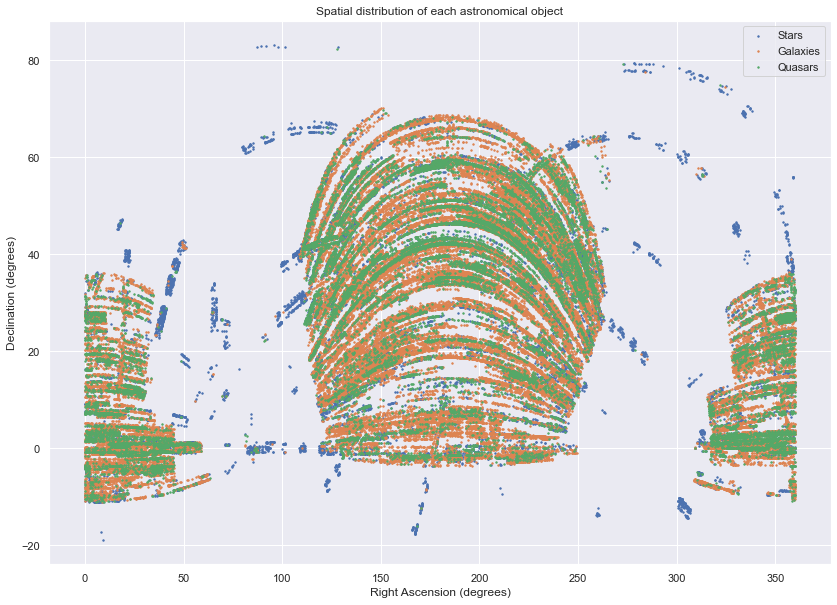

In [19]:
# To plot the positions of the different classes
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(stars['alpha'], stars['delta'], s=2, label='Stars')
ax.scatter(galaxies['alpha'], galaxies['delta'], s=2, label='Galaxies')
ax.scatter(quasars['alpha'], quasars['delta'], s=2, label='Quasars')
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_title('Spatial distribution of each astronomical object')
ax.legend()
plt.show()

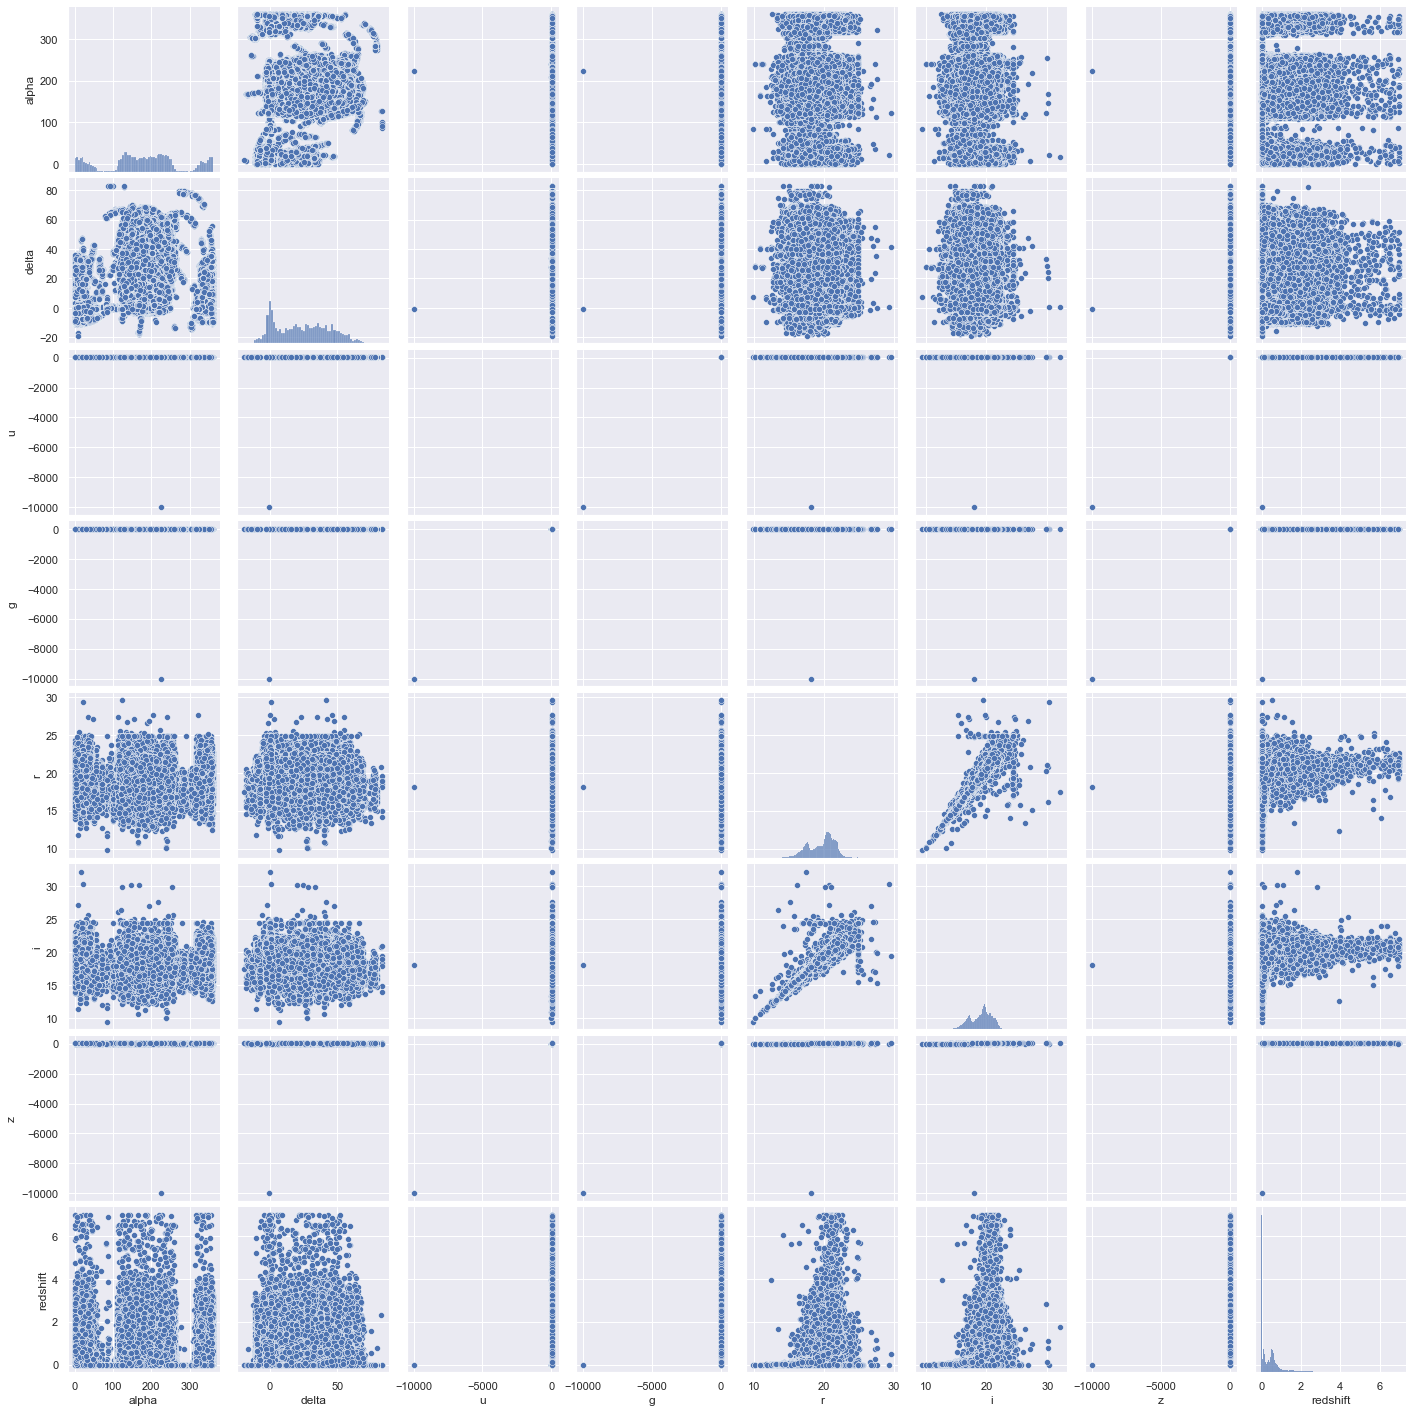

In [17]:
# To visualize the relationship between each feature
sns.pairplot(dfx)